In [85]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [86]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [87]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [88]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m))) * (1 / var)
    w_ = ss @ X.T @ Y
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [89]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.011133097256138674


In [90]:
def display(m, alpha, beta, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha},bate={beta}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


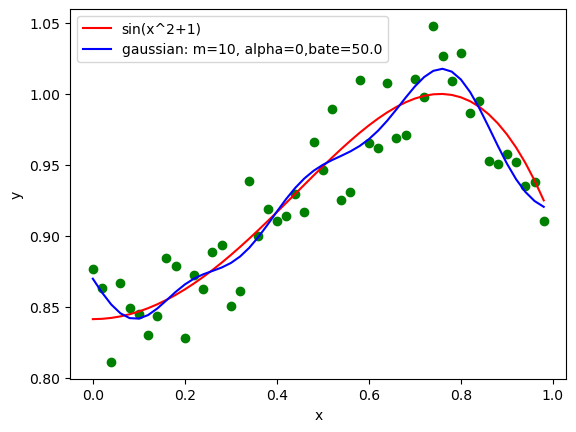

w:  [ 0.92408662 -0.09662614  0.03835177 -0.06715036  0.01927521  0.01562
  0.004393    0.02806266  0.08591132 -0.02910509]


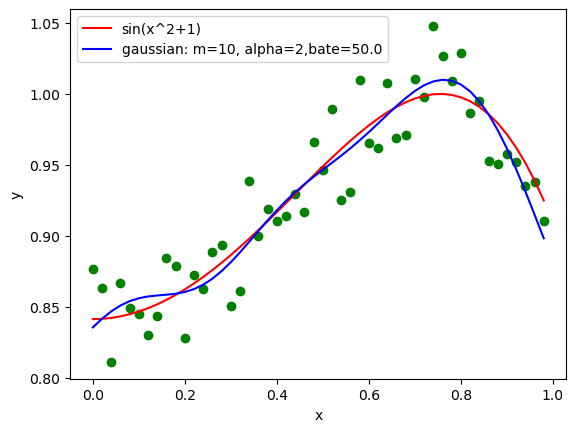

w:  [ 0.7655362   0.10506832 -0.04497403  0.03162135  0.07745994  0.0399261
  0.0374203   0.09130567  0.07059589  0.10262128]


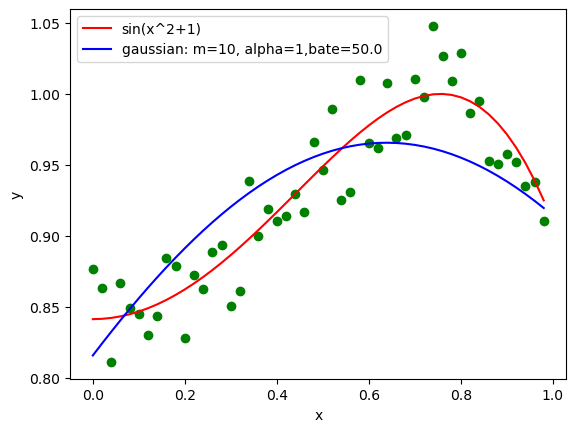

w:  [0.1174362  0.01684501 0.03614108 0.05655308 0.07754026 0.09851357
 0.11886312 0.13798761 0.15532386 0.1703743 ]


In [91]:
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)
params = [(0.01, 0), (0.02, 2), (1, 1)]

for var_el, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



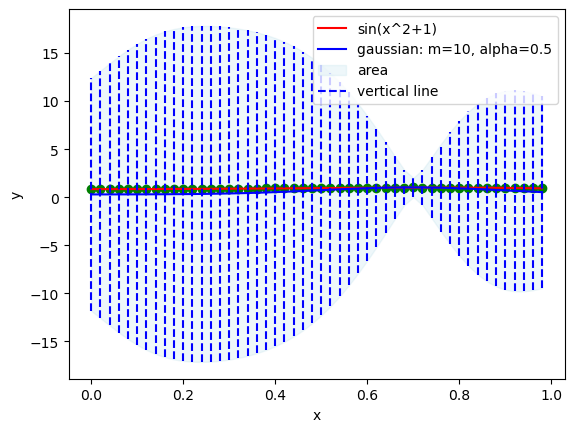

[35]
1


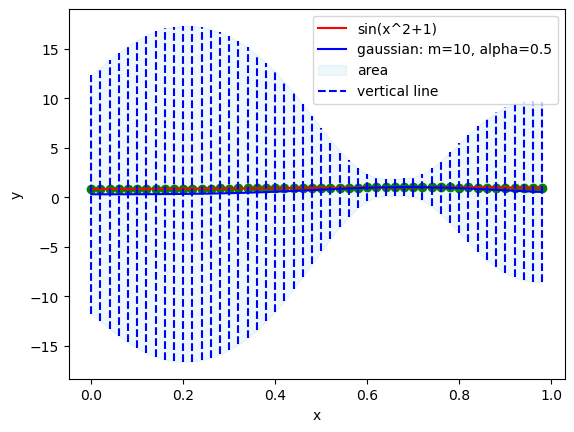

[35, 31]
2


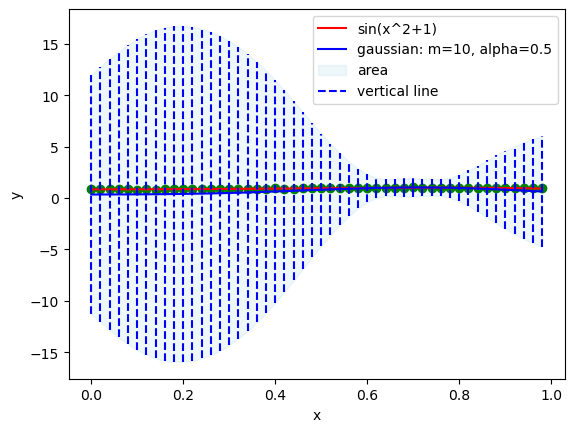

[35, 31, 39]
3


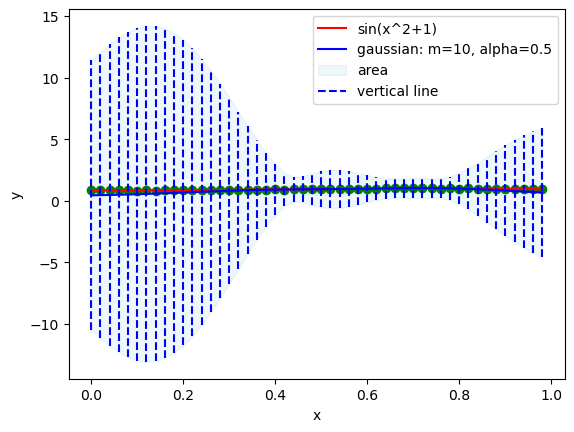

[35, 31, 39, 22]
4


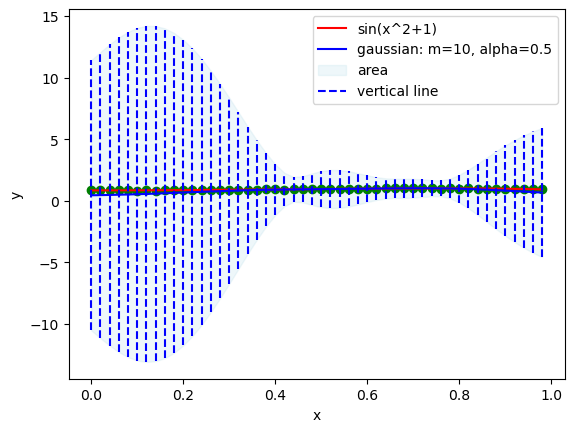

[35, 31, 39, 22, 38]
5


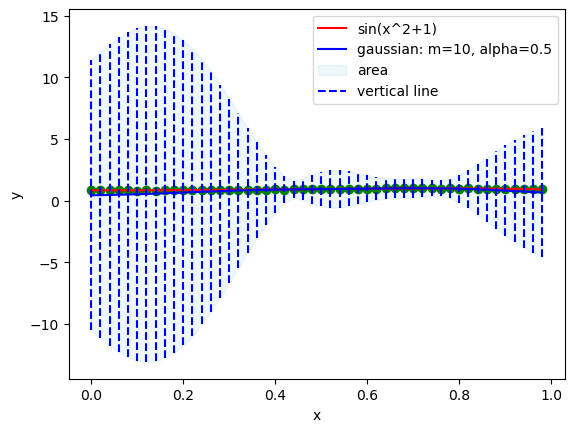

[35, 31, 39, 22, 38, 22]
6


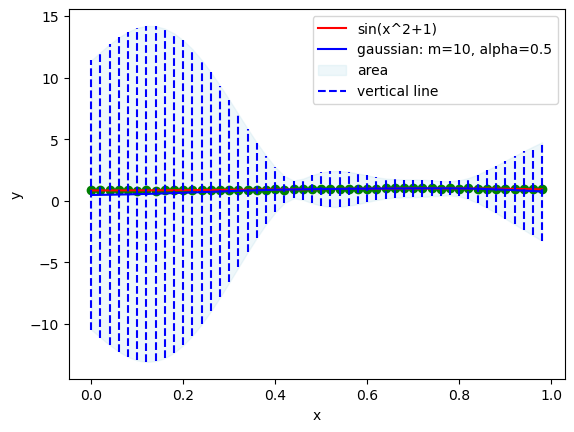

[35, 31, 39, 22, 38, 22, 41]
7


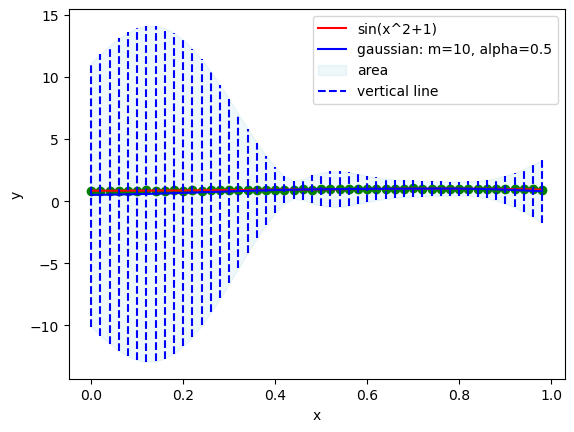

[35, 31, 39, 22, 38, 22, 41, 44]
8


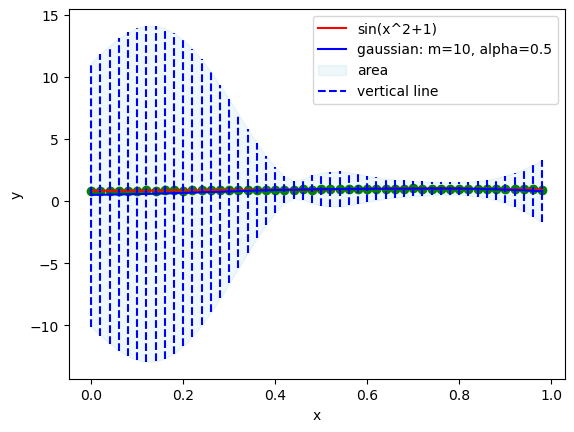

[35, 31, 39, 22, 38, 22, 41, 44, 38]
9


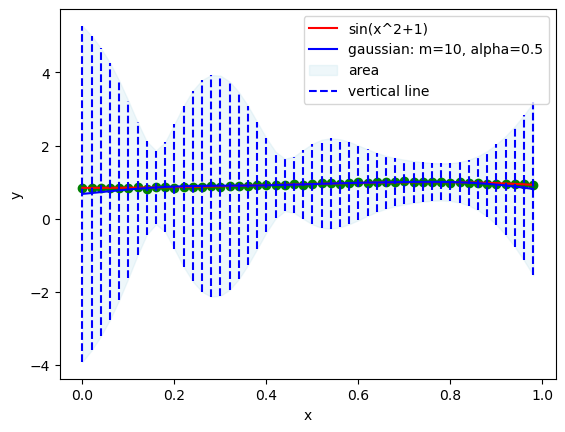

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8]
10


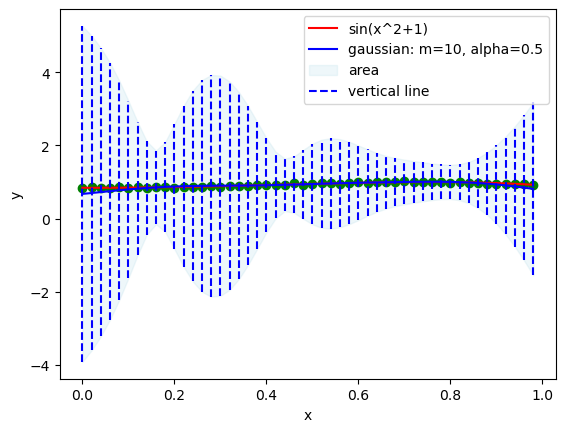

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41]
11


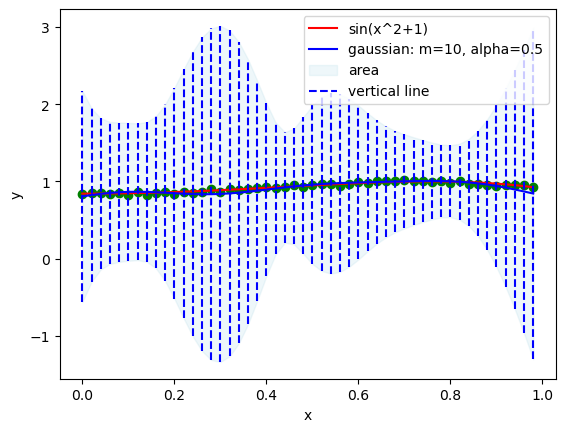

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2]
12


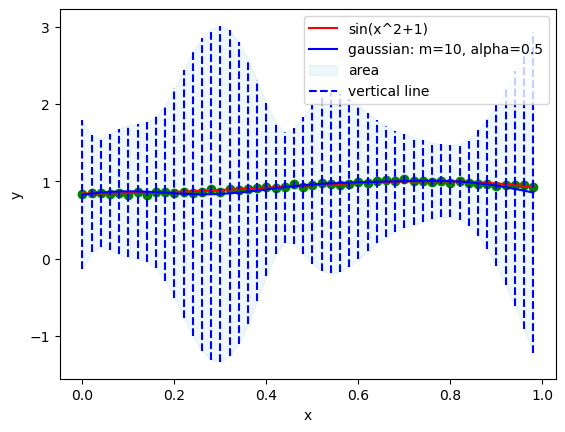

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1]
13


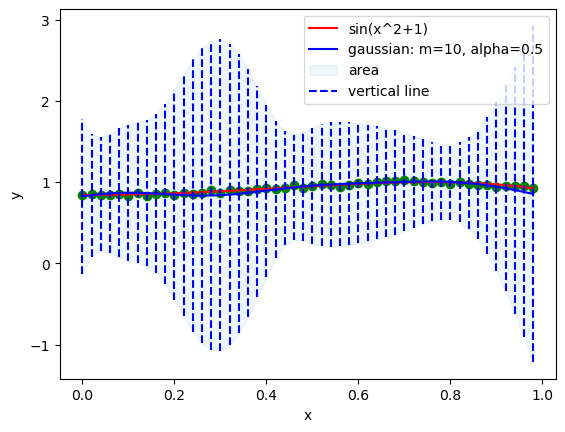

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27]
14


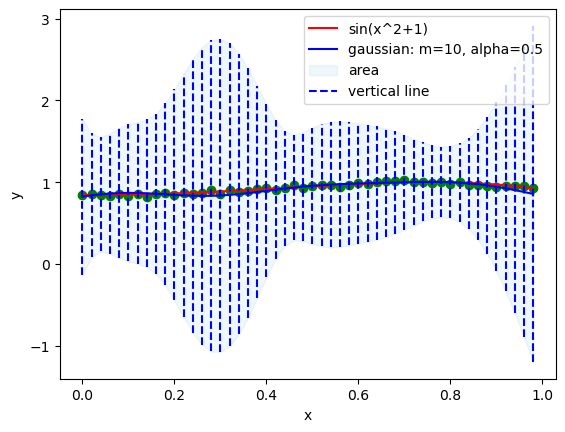

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38]
15


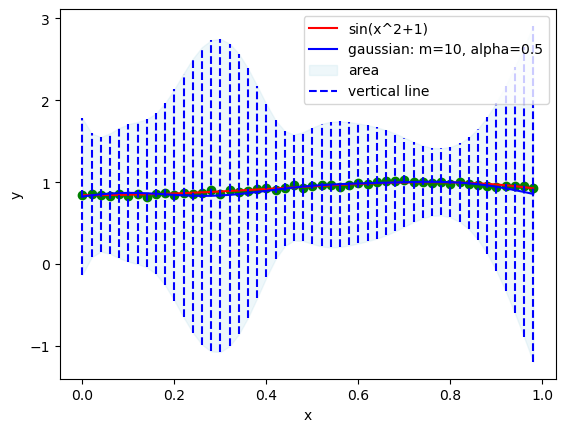

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37]
16


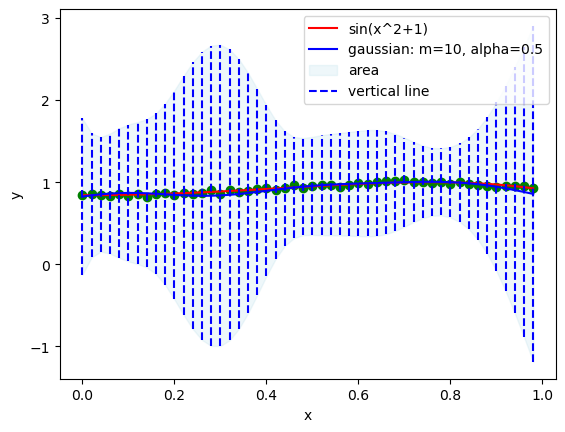

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27]
17


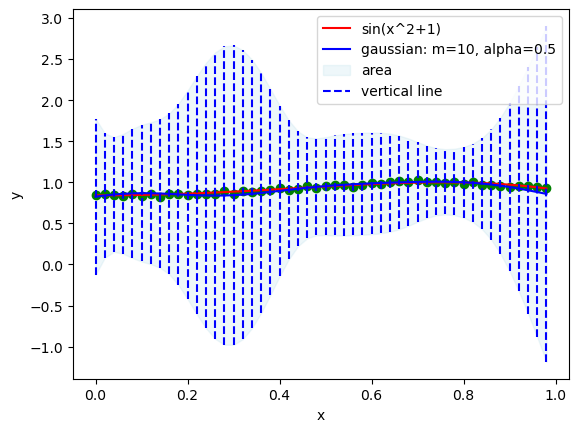

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35]
18


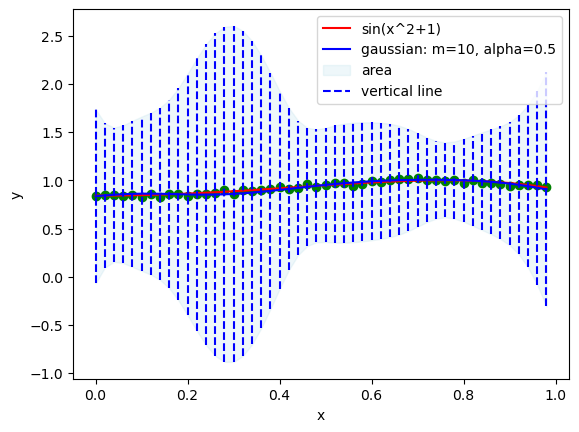

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47]
19


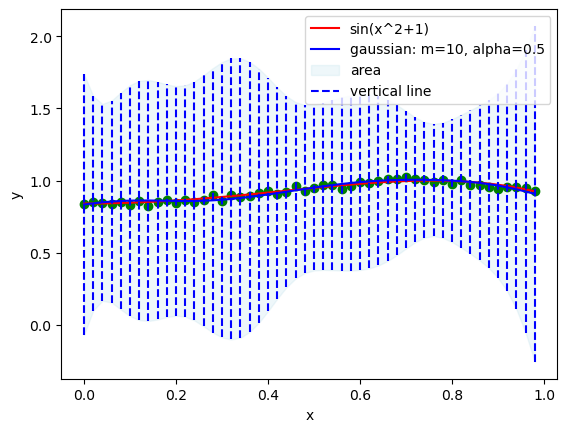

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13]
20


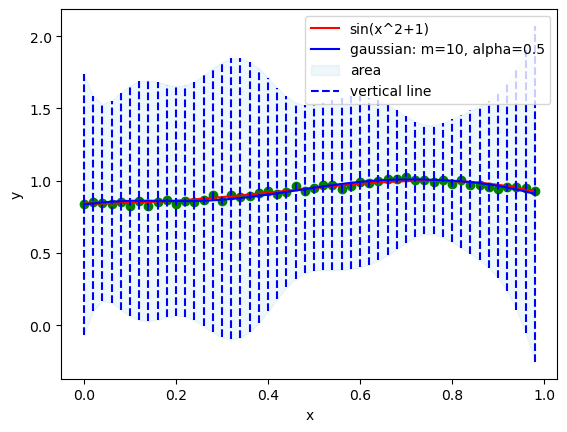

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35]
21


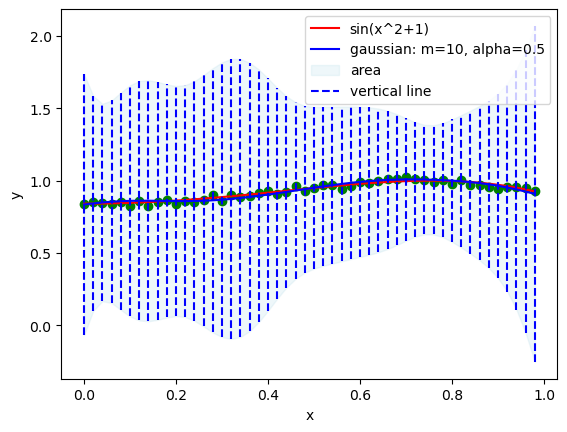

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30]
22


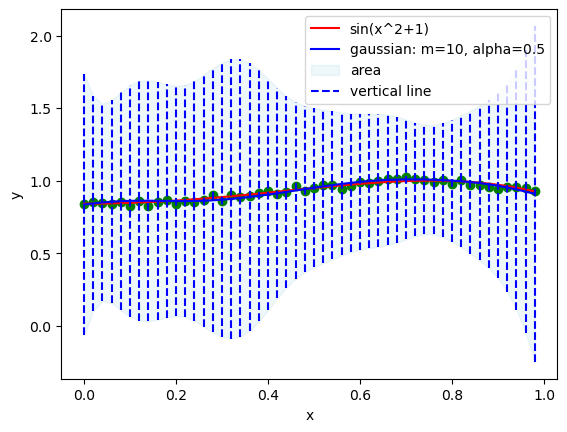

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30]
23


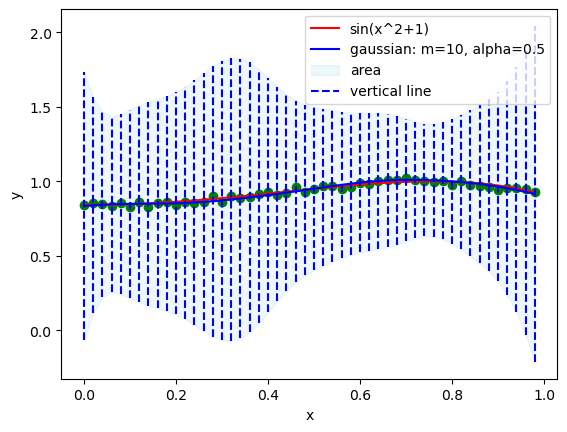

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5]
24


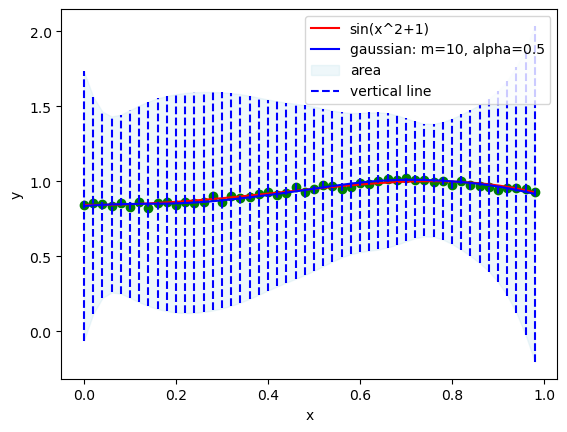

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17]
25


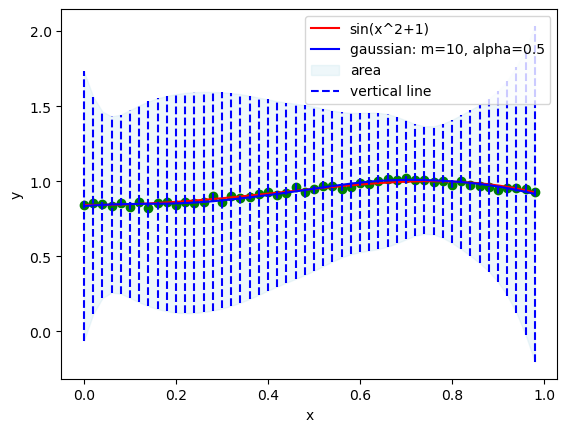

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37]
26


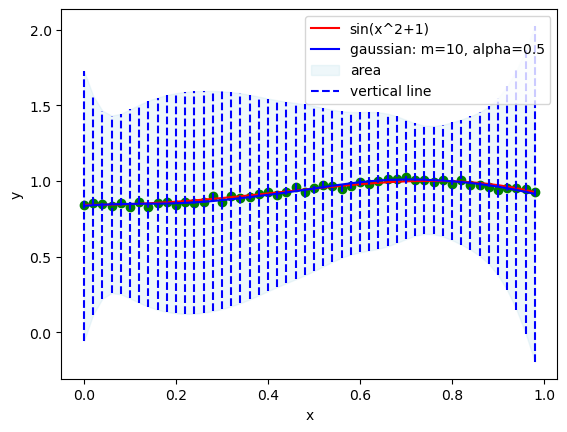

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43]
27


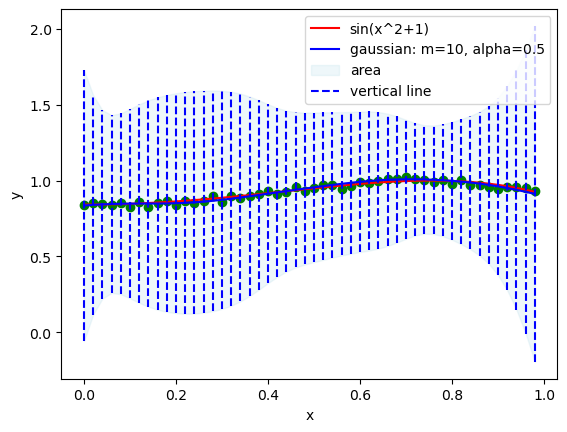

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23]
28


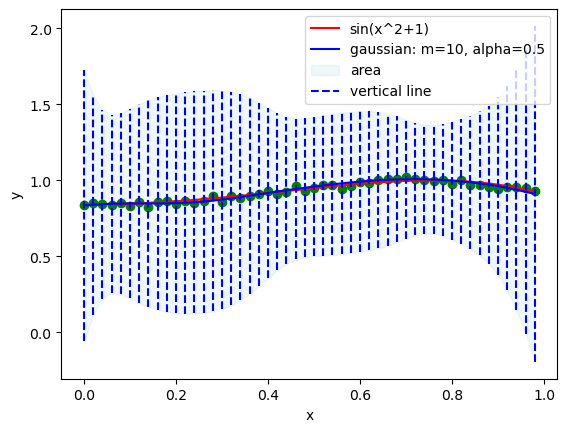

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23]
29


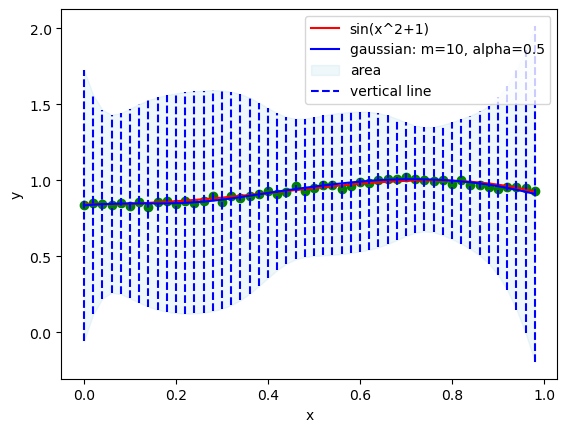

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36]
30


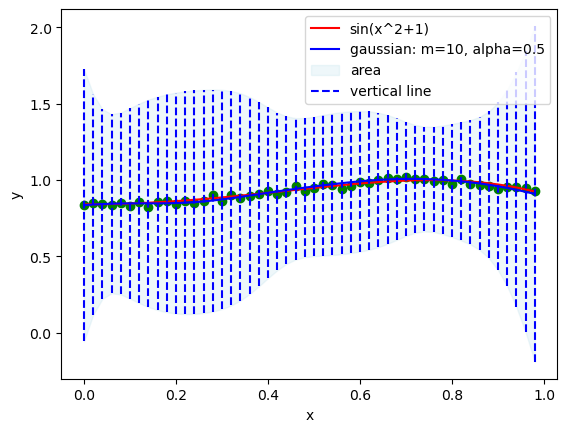

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43]
31


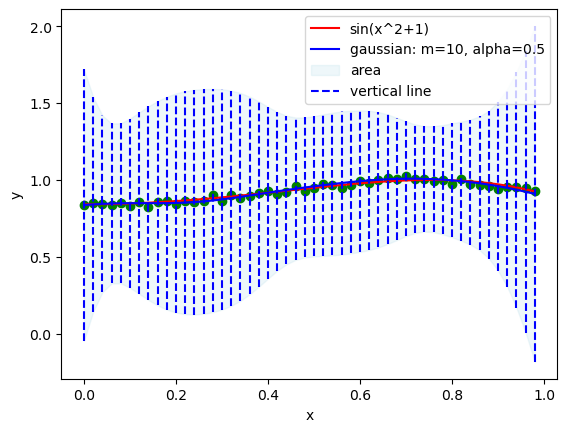

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4]
32


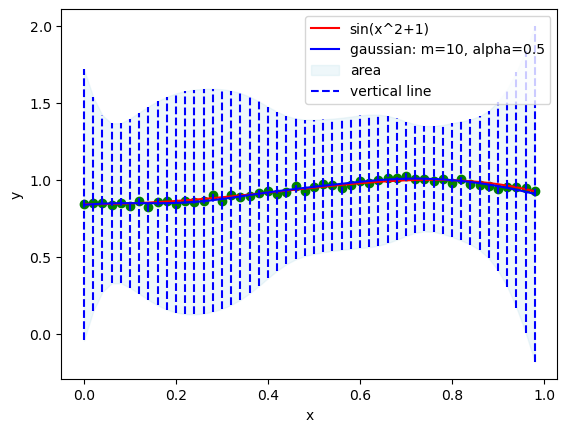

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28]
33


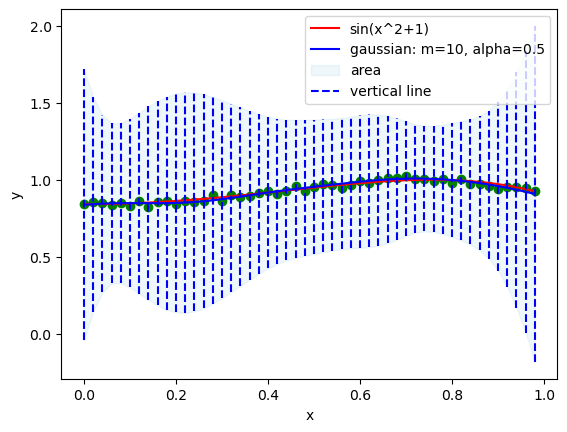

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18]
34


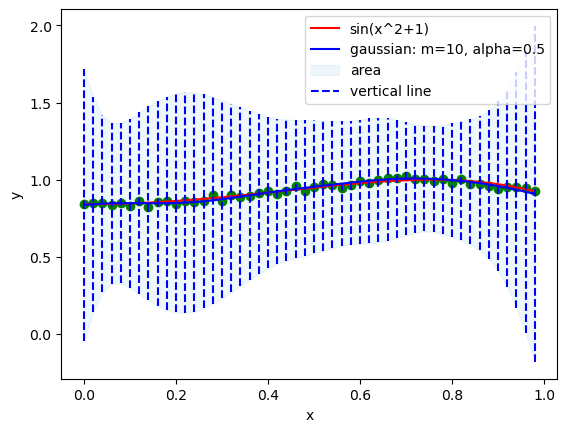

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30]
35


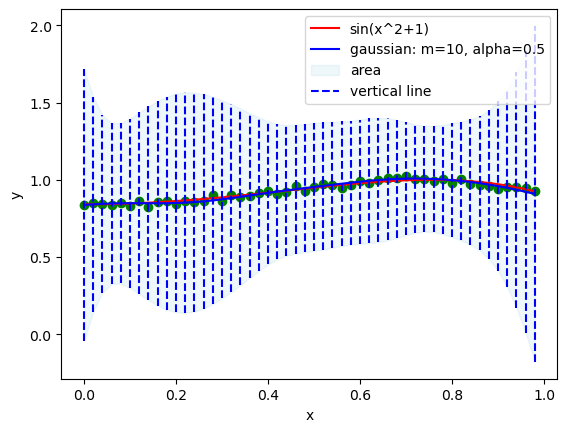

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22]
36


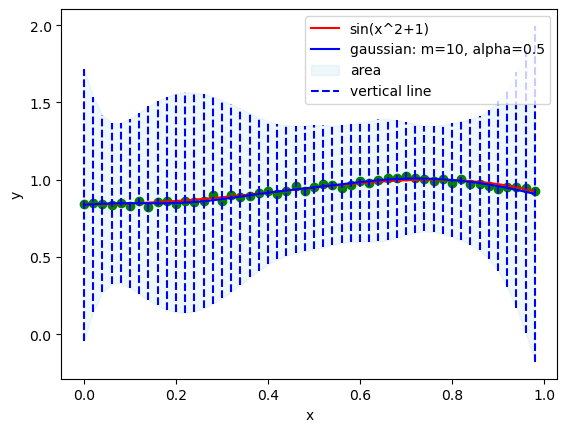

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28]
37


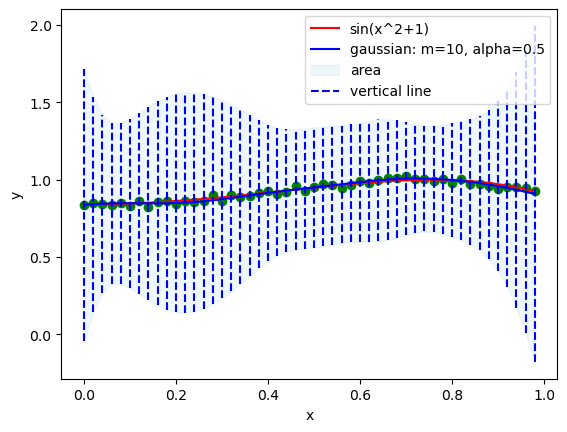

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22]
38


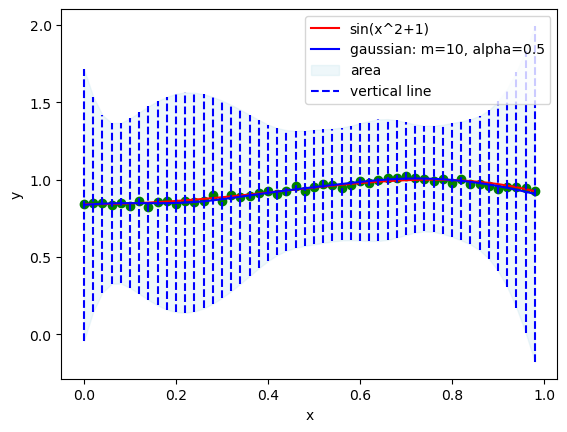

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22, 26]
39


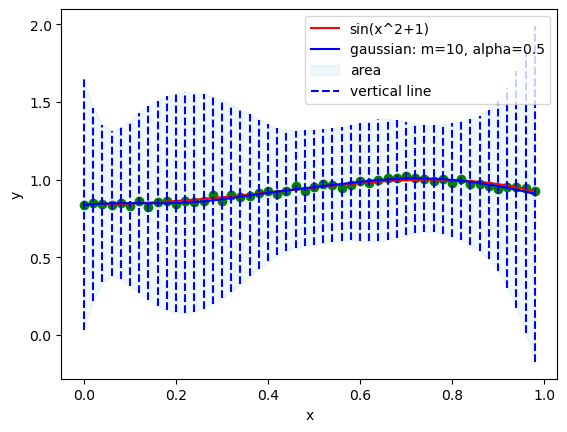

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22, 26, 2]
40


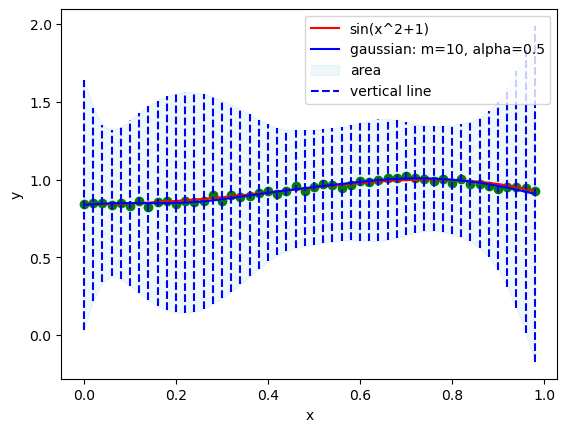

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22, 26, 2, 41]
41


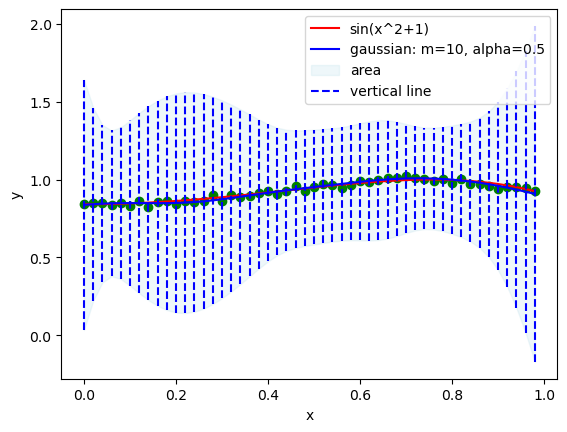

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22, 26, 2, 41, 36]
42


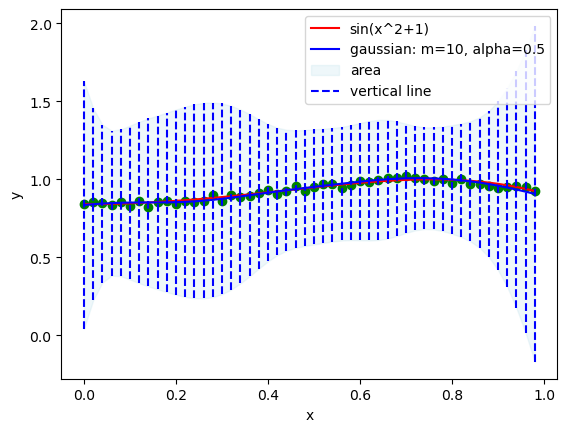

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22, 26, 2, 41, 36, 9]
43


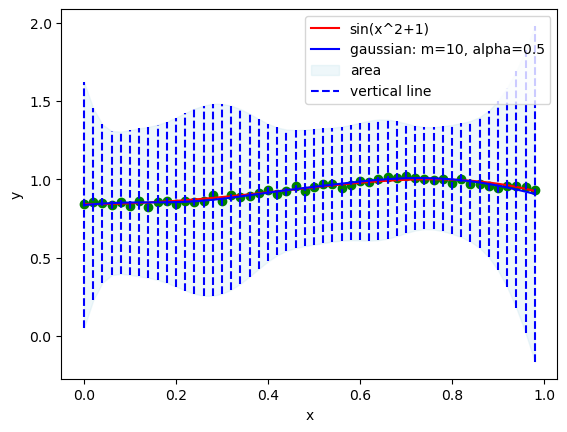

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22, 26, 2, 41, 36, 9, 8]
44


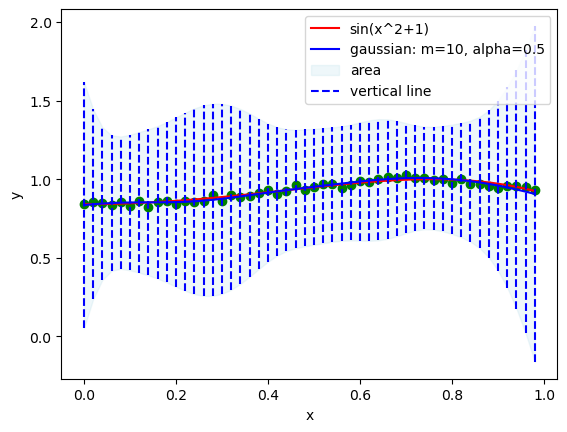

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22, 26, 2, 41, 36, 9, 8, 4]
45


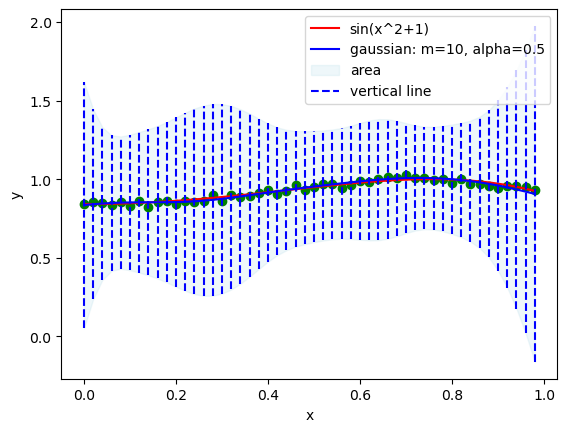

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22, 26, 2, 41, 36, 9, 8, 4, 26]
46


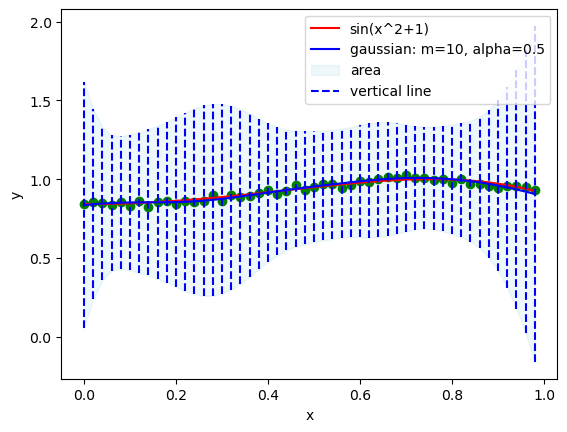

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22, 26, 2, 41, 36, 9, 8, 4, 26, 32]
47


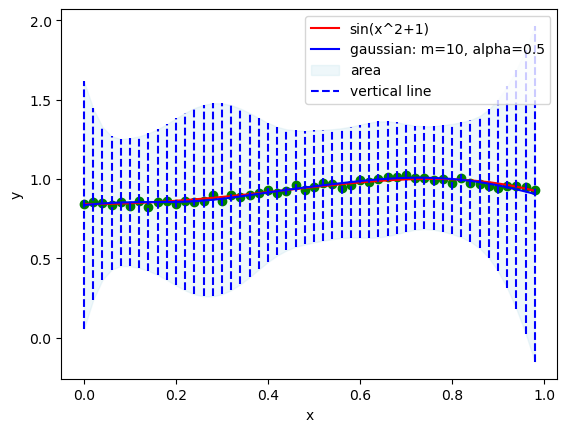

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22, 26, 2, 41, 36, 9, 8, 4, 26, 32, 6]
48


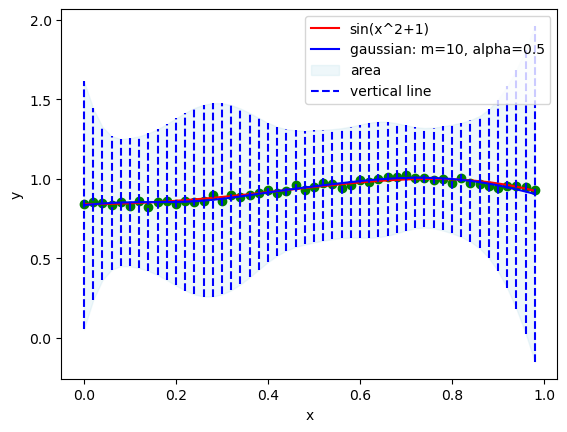

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22, 26, 2, 41, 36, 9, 8, 4, 26, 32, 6, 37]
49


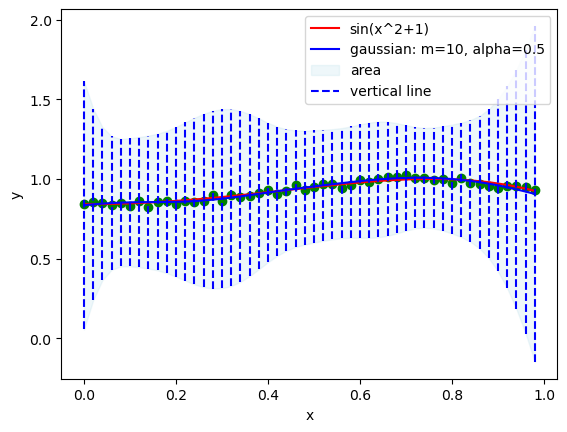

[35, 31, 39, 22, 38, 22, 41, 44, 38, 8, 41, 2, 1, 27, 38, 37, 27, 35, 47, 13, 35, 30, 30, 5, 17, 37, 43, 23, 23, 36, 43, 4, 28, 18, 30, 22, 28, 22, 26, 2, 41, 36, 9, 8, 4, 26, 32, 6, 37, 11]
50


In [92]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


i_arr = []

x, y_origin, y_noise, sub_y = get_data(nodes, mu, var, 1.0, p_1)
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)

for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # x_arr.append(x[index])
    # y_noise_arr.append(y_noise[index])
    w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var, gaussian, 1.0)
    y_ = X @ w_
    var_x = []
    for el in X:
        var_x.append(var + el.T @ ss @ el)

    display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)


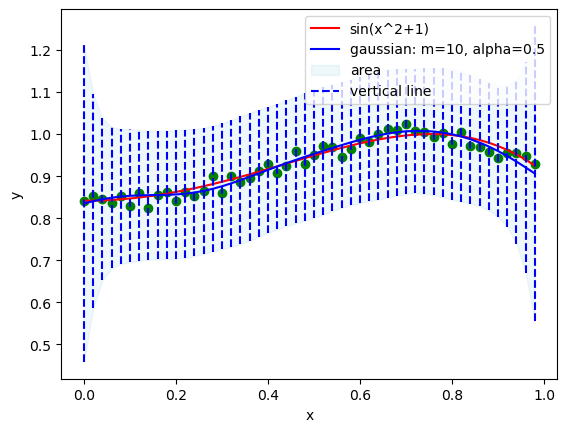

In [93]:
nodes = 50
mu = 0
var = 0.02

w_, X, ss = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)
var_x = []
for el in X:
    var_x.append(var + el.T @ ss @ el)
display_distribution(m, alpha, x, y_, y_origin, y_noise, var_x, 'gaussian', 'sin(x^2+1)')